<a href="https://colab.research.google.com/github/jjimenezo/04-MAIR----Aprendizaje-no-supervisado/blob/master/VC1/distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(-0.22555799999999998, -0.32853499999999997, 'X-2')

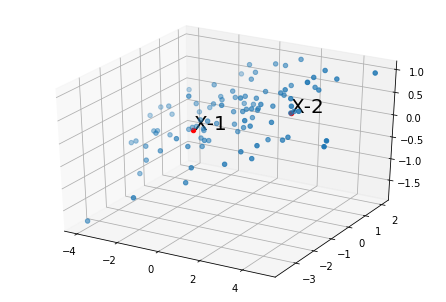

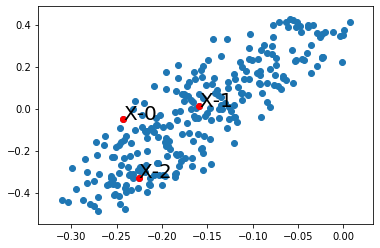

In [3]:
np.random.seed(19) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

n_samples = 100
C = np.array([[1., 0., -0.1], [1.7, .4, .3], [.7, 1.1, .5]])
X = np.dot(np.random.randn(n_samples, 3), C)

# Veamos qué pinta tienen los datos
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[2:,0], X[2:,1], X[2:,2])

ax.scatter(X[1,0], X[1,1], X[1,2], color='red')
ax.text(X[1,0],X[1,1],X[1,2],  '%s' % ("X-1"), size=20, zorder=1, color='k') 

ax.scatter(X[2,0], X[2,1], X[2,2], color='red')
ax.text(X[2,0],X[2,1],X[2,2],  '%s' % ("X-2"), size=20, zorder=1, color='k') 

# Cargamos también un conjunto de datos
data_file_url = 'https://raw.githubusercontent.com/javier-sevilla/ANS/master/datasets/sinteticos/dataset_dos_guassianas.csv'
D = np.array(pd.read_csv(data_file_url))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[D[:,2]==2,0:2] # nos quedamos con uno de los clústeres y eliminamos la variable de la categoría

fig, ax = plt.subplots()
ax.scatter(Dx[:,0],Dx[:,1])

ax.scatter(Dx[0,0], Dx[0,1], color='red')
ax.text(Dx[0,0],Dx[0,1], '%s' % ("X-0"), size=20, zorder=1, color='k') 
ax.scatter(Dx[1,0], Dx[1,1], color='red')
ax.text(Dx[1,0],Dx[1,1], '%s' % ("X-1"), size=20, zorder=1, color='k') 
ax.scatter(Dx[2,0], Dx[2,1], color='red')
ax.text(Dx[2,0],Dx[2,1], '%s' % ("X-2"), size=20, zorder=1, color='k')

In [8]:
def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


print('distancia_euclidiana = ',distancia_euclidiana(X[1,:],X[2,:]))


def distancia_manhattan(x, y):   
    return np.sum(np.absolute(x - y))

print('distancia_manhattan = ',distancia_manhattan(X[1,:],X[2,:]))

distancia_euclidiana =  3.96076724536307
distancia_manhattan =  5.278552409196977


In [10]:
def p_norma(x, y, p):   
    return np.sum(np.absolute(x - y) ** p)**1/p

print('Diferencia entre 2-norma y dist. euclidiana = ',p_norma(X[1,:],X[2,:],2)-distancia_euclidiana(X[1,:],X[2,:]))
print('Diferencia entre 1-norma y dist. manhattan  = ',p_norma(X[1,:],X[2,:],1)-distancia_manhattan(X[1,:],X[2,:]))

Diferencia entre 2-norma y dist. euclidiana =  3.88307134060741
Diferencia entre 1-norma y dist. manhattan  =  0.0


In [0]:
def matriz_covarianza(X):
    Xm = X-np.mean(X,axis=0)
    mC = np.zeros((X.shape[1],X.shape[1]))
    for pair in it.product(np.arange(X.shape[1]), repeat=2):
        mC[pair] = np.sum(#### TU CODIGO AQUI ####
        )/float(X.shape[0] - 1)
    return mC

In [16]:
def distancia_mahalanobis(x,y,mCi):
    v = x-y
    v.shape=(v.size,1)
    res = a
    return res

mC = matriz_covarianza(X)
mCi = np.linalg.inv(mC)
print('Distancia = ',distancia_mahalanobis(X[1,:],X[2,:],mCi), ' (** ESTA ES LA RESPUESTA A INCLUIR EN EL CAMPUS **)')

TypeError: ignored

In [13]:
mdC = matriz_covarianza(Dx)
mdCi = np.linalg.inv(mdC)
print('Distancia X1-X0 mahalanobis = ',distancia_mahalanobis(Dx[1,:],Dx[0,:],mdCi), 
      '\tvs. euclidiana = ', distancia_euclidiana(Dx[1,:],Dx[0,:]))
print('Distancia X1-X2 mahalanobis = ',distancia_mahalanobis(Dx[1,:],Dx[2,:],mdCi), 
      '\tvs. euclidiana = ', distancia_euclidiana(Dx[1,:],Dx[2,:]))

TypeError: ignored

In [0]:

def similitud_coseno(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * #### TU CODIGO AQUI ####
                          )
print(similitud_coseno(X[0,:],X[1,:]))
print(similitud_coseno(X[0,:],X[2,:]))

def disimilitud_coseno(x, y):
    return 1-similitud_coseno(x, y)

In [0]:
def distancia_hamming(x, y):
    return np.sum(x!=y)

def similitud_jaccard(x, y):
    return np.sum(x*y)/float(np.sum(x+y>0))

def distancia_jaccard(x, y):
    return 1-similitud_jaccard(x,y)

Xb = np.random.randint(0,2,n_samples*5)
Xb.shape = (n_samples, 5)

print(distancia_hamming(Xb[1,:],Xb[2,:]))
print(distancia_jaccard(Xb[1,:],Xb[2,:]))

In [0]:
#solo para una dimension
def distancia_categorica(x, y):
    return 1-int(x==y)

def distancia_heterogenea(x, y, w, distancias):
    return np.sum([w[d]*distancias[d](x[d],y[d]) for d in np.arange(x.size)])

w = np.array([1,1,1,1,1])
ds = [distancia_manhattan,distancia_manhattan, distancia_categorica,distancia_categorica,distancia_categorica]

#distancia_heterogenea(Xb[1,:],Xb[2,:],w,ds)

In [0]:
def calcular_pesos(X, distancias):
    vW = np.zeros(X.shape[1])
    for d in np.arange(X.shape[1]):
        for pair in it.product(np.arange(X.shape[0]), repeat=2):
            vW[d] += distancias[d](X[pair[0],d],X[pair[1],d])
    vW /= float(X.shape[0]**2)
    return 1/vW

w_a = calcular_pesos(Xb, ds)

print(w_a)

print('Distancia heterogenea sin ajustar w  = ',distancia_heterogenea(Xb[1,:],Xb[2,:],w,ds))
print('Distancia heterogenea con w ajustado = ',distancia_heterogenea(Xb[1,:],Xb[2,:],w_a,ds))

In [0]:
def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(#### TU CODIGO AQUI ####
        )
    return mD

Ma = matriz_distancias(X, distancia_euclidiana)

def matriz_similitud(X,distancia,C):
    mD = matriz_distancias(X,distancia)
    return np.exp(-mD**2/C)

S = matriz_similitud(X, distancia_euclidiana,1)

In [0]:
from scipy.spatial.distance import minkowski, mahalanobis, jaccard, hamming, euclidean, cosine

# Calcular la matriz de covarianzas usando NumPy
#np.cov(X.transpose())
print('La diferencia entre las dos versiones de la matriz de covarianzas es = ',
      np.round(np.sum(np.cov(X.transpose())-mC),10))

# Calcular la distancia de Mahalanobis:
#mahalanobis(X[1,:],X[2,:],mCi)
print('La diferencia entre las dos versiones de la distancia de Mahalanobis es = ',
      (distancia_mahalanobis(X[1,:],X[2,:],mCi)-mahalanobis(X[1,:],X[2,:],mCi)))

# La función Minkowski de SciPy es la p-norma
#minkowski(X[1,:],X[2,:],p)
print('La diferencia entre las dos versiones de la p-norma (p=1) es = ',
      (p_norma(X[1,:],X[2,:],1)-minkowski(X[1,:],X[2,:],1)),
     ' o también (p=2) = ',(p_norma(X[1,:],X[2,:],2)-minkowski(X[1,:],X[2,:],2)))

#Otras medidas son:
#cosine(X[1,:],X[2,:])
#euclidean(X[1,:],X[2,:])
#jaccard(X[1,:],X[2,:])
#hamming(X[1,:],X[2,:])

In [0]:
from scipy.spatial import distance_matrix

Mb = distance_matrix(X, X, p=2)

print('La diferencia entre las dos versiones de la matriz de covarianzas es = ', np.round(np.abs(np.sum(Ma-Mb)),10))